<a href="https://colab.research.google.com/github/harshitha-0531/Digit-recognizer/blob/main/Day8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import pandas and numpy and tenserflow and matplot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix,classification_report


import plotly.graph_objs as go
from plotly.subplots import make_subplots

In [2]:
fashion_mnist

<module 'keras.datasets.fashion_mnist' from '/usr/local/lib/python3.12/dist-packages/keras/datasets/fashion_mnist/__init__.py'>

In [3]:
fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [4]:
[train_images,train_labels],[test_images,test_labels]=fashion_mnist.load_data()

In [5]:
train_images=train_images/255.0
test_images=test_images/255.0

In [6]:
train_images=train_images.reshape((train_images.shape[0],28,28,1))
test_images=test_images.reshape((test_images.shape[0],28,28,1))

In [7]:
train_labels_one_hot=to_categorical(train_labels,num_classes=10)
test_labels_one_hot=to_categorical(test_labels,num_classes=10)

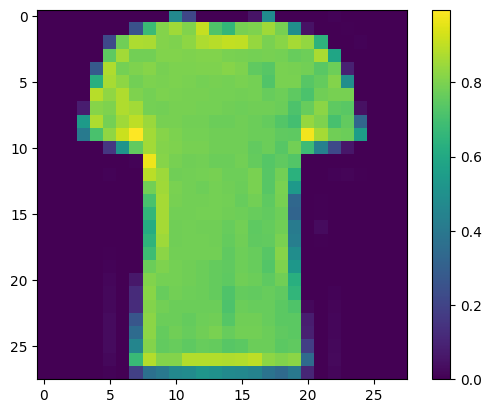

In [8]:
plt.figure()
plt.imshow(train_images[5999])
plt.colorbar()
plt.grid(False)
plt.show()

In [9]:
train_labels[1]

np.uint8(0)

In [10]:
ann_model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])
ann_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
ann_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
ann_model.fit(
    train_images,
    train_labels_one_hot,
    epochs=10,
    batch_size=60,
    validation_data=(test_images,test_labels_one_hot))

Epoch 1/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7733 - loss: 0.6559 - val_accuracy: 0.8502 - val_loss: 0.4171
Epoch 2/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8654 - loss: 0.3792 - val_accuracy: 0.8651 - val_loss: 0.3755
Epoch 3/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.8731 - loss: 0.3447 - val_accuracy: 0.8582 - val_loss: 0.3838
Epoch 4/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.8859 - loss: 0.3139 - val_accuracy: 0.8744 - val_loss: 0.3506
Epoch 5/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8897 - loss: 0.2953 - val_accuracy: 0.8733 - val_loss: 0.3498
Epoch 6/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8996 - loss: 0.2737 - val_accuracy: 0.8739 - val_loss: 0.3416
Epoch 7/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9024 - loss: 0.2640 - val_accuracy: 0.8773 - val_loss: 0.3486
Epoch 8/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9073 - loss: 0.2518 -

In [12]:
basic_cnn_model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])
basic_cnn_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
basic_cnn_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
basic_cnn_model.fit(
    train_images.reshape(-1,28,28,1),
    train_labels_one_hot,
    epochs=5,
    batch_size=60,
    validation_data=(test_images.reshape(-1,28,28,1),test_labels_one_hot)
)

Epoch 1/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 46s 45ms/step - accuracy: 0.7429 - loss: 0.7027 - val_accuracy: 0.8580 - val_loss: 0.3899
Epoch 2/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 47s 47ms/step - accuracy: 0.8791 - loss: 0.3329 - val_accuracy: 0.8864 - val_loss: 0.3161
Epoch 3/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 45s 45ms/step - accuracy: 0.8962 - loss: 0.2846 - val_accuracy: 0.8913 - val_loss: 0.2984
Epoch 4/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 45s 45ms/step - accuracy: 0.9088 - loss: 0.2499 - val_accuracy: 0.8873 - val_loss: 0.2952
Epoch 5/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 83s 46ms/step - accuracy: 0.9179 - loss: 0.2178 - val_accuracy: 0.8982 - val_loss: 0.2658


In [14]:
deeper_cnn_model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128,activation='relu', input_shape=(128,)), # Explicitly setting input shape
    tf.keras.layers.Dense(10,activation='softmax')
])
deeper_cnn_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
deeper_cnn_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 11, 11, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 3, 3, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,882 (437.04 KB)

 Trainable params: 111,178 (434.29 KB)

 Non-trainable params: 704 (2.75 KB)

In [23]:
# training the  ann model
early_shopping=keras.callbacks.EarlyStopping(monitor='val_loss',patience=5,
                                             verbose=1,
                                             mode='auto',
                                             restore_best_weights=True)
model_checkpoint_ann=keras.callbacks.ModelCheckpoint(
    filepath='ann_model.h5',
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    save_weights_only=False,
    verbose=1
)
print("Training the ANN model")
ann_history = ann_model.fit(
    train_images,
    train_labels_one_hot,
    epochs=5,
    batch_size=60,
    validation_data=(test_images,test_labels_one_hot),
    callbacks=[early_shopping,model_checkpoint_ann]
)
print("Finished")

Training the ANN model
Epoch 1/5
 994/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9241 - loss: 0.2030
Epoch 1: val_loss improved from inf to 0.34603, saving model to ann_model.h5


1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9241 - loss: 0.2030 - val_accuracy: 0.8879 - val_loss: 0.3460
Epoch 2/5
 995/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9277 - loss: 0.1943
Epoch 2: val_loss did not improve from 0.34603
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9277 - loss: 0.1944 - val_accuracy: 0.8901 - val_loss: 0.3473
Epoch 3/5
 998/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9280 - loss: 0.1896
Epoch 3: val_loss improved from 0.34603 to 0.33446, saving model to ann_model.h5


1000/1000 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9280 - loss: 0.1896 - val_accuracy: 0.8912 - val_loss: 0.3345
Epoch 4/5
 998/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9295 - loss: 0.1863
Epoch 4: val_loss did not improve from 0.33446
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9295 - loss: 0.1863 - val_accuracy: 0.8903 - val_loss: 0.3545
Epoch 5/5
 997/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9343 - loss: 0.1734
Epoch 5: val_loss did not improve from 0.33446
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9343 - loss: 0.1734 - val_accuracy: 0.8893 - val_loss: 0.3524
Restoring model weights from the end of the best epoch: 3.
Finished


In [26]:
model_checkpoint_basic_cnn=keras.callbacks.ModelCheckpoint(
    filepath='basic_cnn_model.weights.h5',
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    save_weights_only=True,
    verbose=1
)
print("Training the basic CNN model")
basic_cnn_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy']) # Added compilation
basic_cnn_history = basic_cnn_model.fit(
    train_images.reshape(-1,28,28,1),
    train_labels_one_hot,
    epochs=5,
    batch_size=60,
    validation_data=(test_images.reshape(-1,28,28,1),test_labels_one_hot),
    callbacks=[early_shopping,model_checkpoint_basic_cnn]
)

Training the basic CNN model
Epoch 1/5
 999/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.9316 - loss: 0.1851
Epoch 1: val_loss improved from inf to 0.24998, saving model to basic_cnn_model.weights.h5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 54s 53ms/step - accuracy: 0.9316 - loss: 0.1851 - val_accuracy: 0.9114 - val_loss: 0.2500
Epoch 2/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.9392 - loss: 0.1608
Epoch 2: val_loss did not improve from 0.24998
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 110s 81ms/step - accuracy: 0.9392 - loss: 0.1608 - val_accuracy: 0.9077 - val_loss: 0.2583
Epoch 3/5
 999/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.9462 - loss: 0.1466
Epoch 3: val_loss did not improve from 0.24998
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 54s 53ms/step - accuracy: 0.9462 - loss: 0.1466 - val_accuracy: 0.9114 - val_loss: 0.2617
Epoch 4/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.9512 - loss: 0.1311
Epoch 4: val_loss improved from 0.24998 to 0.23916, saving model to ba

In [27]:
# trian deeper cnn
model_checkpoint_deeper_cnn=keras.callbacks.ModelCheckpoint(
    filepath='deeper_cnn_model.weights.h5',
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    save_weights_only=True,
    verbose=1
)
print("Training the deeper CNN model")
deeper_cnn_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy']) # Added compilation
deeper_cnn_history = deeper_cnn_model.fit(
    train_images.reshape(-1,28,28,1),
    train_labels_one_hot,
    epochs=5,
    batch_size=60,
    validation_data=(test_images.reshape(-1,28,28,1),test_labels_one_hot),
    callbacks=[early_shopping,model_checkpoint_deeper_cnn]
)

Training the deeper CNN model
Epoch 1/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - accuracy: 0.8643 - loss: 0.3810
Epoch 1: val_loss improved from inf to 0.54131, saving model to deeper_cnn_model.weights.h5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 123s 117ms/step - accuracy: 0.8643 - loss: 0.3810 - val_accuracy: 0.8151 - val_loss: 0.5413
Epoch 2/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - accuracy: 0.8754 - loss: 0.3458
Epoch 2: val_loss improved from 0.54131 to 0.43275, saving model to deeper_cnn_model.weights.h5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 142s 117ms/step - accuracy: 0.8754 - loss: 0.3458 - val_accuracy: 0.8394 - val_loss: 0.4328
Epoch 3/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 0.8835 - loss: 0.3254
Epoch 3: val_loss improved from 0.43275 to 0.40644, saving model to deeper_cnn_model.weights.h5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 149s 124ms/step - accuracy: 0.8835 - loss: 0.3254 - val_accuracy: 0.8457 - val_loss: 0.4064
Epoch 4/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/

In [ ]:
# evalution
ann_model.load_weights('ann_model.h5')
basic_cnn_model.load_weights('basic_cnn_model.weights.h5')
deeper_cnn_model.load_weights('deeper_cnn_model.weights.h5')

# loss
loss_ann,accuracy_ann=ann_model.evaluate(test_images,test_labels_one_hot)
loss_basic_cnn,accuracy_basic_cnn=basic_cnn_model.evaluate(test_images.reshape(-1,28,28,1),test_labels_one_hot)
loss_deeper_cnn,accuracy_deeper_cnn=deeper_cnn_model.evaluate(test_images.reshape(-1,28,28,1),test_labels_one_hot)

# Data report
models=['ANN','Basic CNN','Deeper CNN']
loss_values=[loss_ann,loss_basic_cnn,loss_deeper_cnn]
accuracy_values=[accuracy_ann,accuracy_basic_cnn,accuracy_deeper_cnn]

# mode style
plt.style.use("dark_background")
fig,axes =plt.subplots(1,2,figsize=(12,5))
# plots of lost data
axes[0].bar(models,loss_values,color='red')
axes[0].set_xlabel('Models')
axes[0].set_ylabel('Loss')
axes[0].set_title('Loss Comparison')
axes[0].grid(True)

# plots of accuracy data
axes[1].bar(models,accuracy_values,color='green')
axes[1].set_xlabel('Models')
axes[1].set_ylabel('Accuracy')
axes[1].set_title('Accuracy Comparison')
axes[1].grid(True)

plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


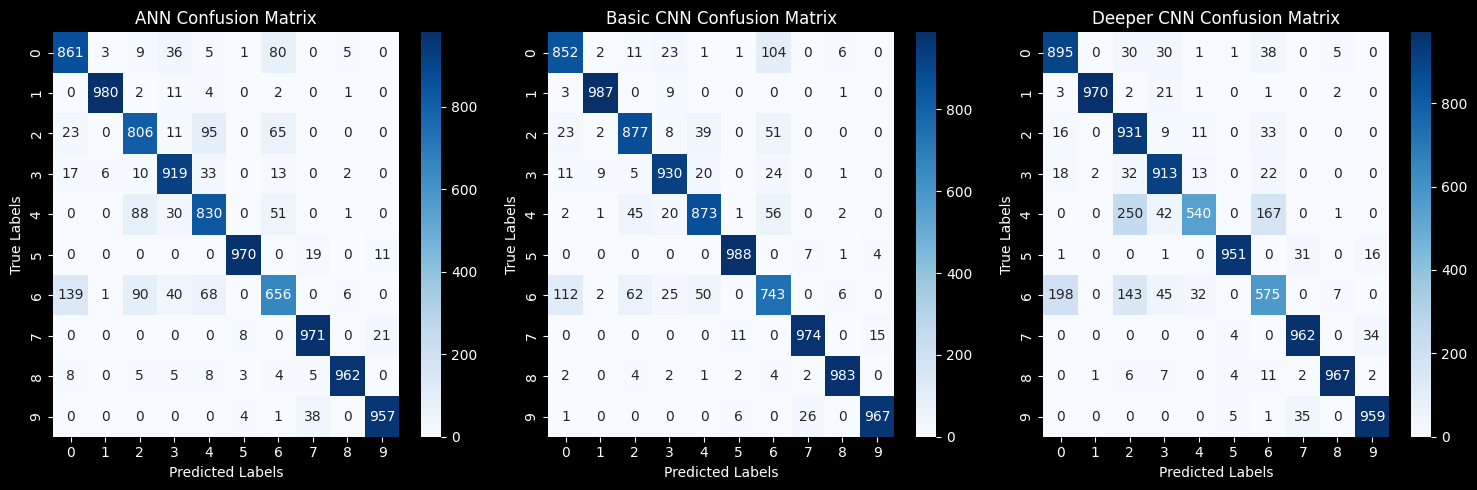

In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# predictions

ann_predictions=ann_model.predict(test_images)
basic_cnn_predictions=basic_cnn_model.predict(test_images.reshape(-1,28,28,1))
deeper_cnn_predictions=deeper_cnn_model.predict(test_images.reshape(-1,28,28,1))

# convert
test_labels_int=np.argmax(test_labels_one_hot,axis=1)

# labels
ann_labels=np.argmax(ann_predictions,axis=1)
basic_cnn_labels=np.argmax(basic_cnn_predictions,axis=1)
deeper_cnn_labels=np.argmax(deeper_cnn_predictions,axis=1)

#confusion matrices
cm_ann=confusion_matrix(test_labels_int,ann_labels)
cm_basic_cnn=confusion_matrix(test_labels_int,basic_cnn_labels)
cm_deeper_cnn=confusion_matrix(test_labels_int,deeper_cnn_labels)

fig,axes=plt.subplots(1,3,figsize=(15,5))

sns.heatmap(cm_ann,annot=True,fmt='d',cmap='Blues',ax=axes[0])
axes[0].set_title('ANN Confusion Matrix')
axes[0].set_xlabel('Predicted Labels')
axes[0].set_ylabel('True Labels')

sns.heatmap(cm_basic_cnn,annot=True,fmt='d',cmap='Blues',ax=axes[1])
axes[1].set_title('Basic CNN Confusion Matrix')
axes[1].set_xlabel('Predicted Labels')
axes[1].set_ylabel('True Labels')

sns.heatmap(cm_deeper_cnn,annot=True,fmt='d',cmap='Blues',ax=axes[2])
axes[2].set_title('Deeper CNN Confusion Matrix')
axes[2].set_xlabel('Predicted Labels')
axes[2].set_ylabel('True Labels')

plt.tight_layout()
plt.show()

In [28]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
model={
    'ANN':("cyan",ann_history),
    'Basic CNN':("magenta",basic_cnn_history),
    'Deeper CNN':("yellow",deeper_cnn_history)
}
performance_data={
    'Model':['ANN','Basic CNN','Deeper CNN'],
    'Loss':[loss_ann,loss_basic_cnn,loss_deeper_cnn],
    'Accuracy':[accuracy_ann,accuracy_basic_cnn,accuracy_deeper_cnn]
}
performance_df=pd.DataFrame(performance_data)
fig=make_subplots(rows=1,cols=2,subplot_titles=['Loss','Accuracy'])

for name, (color,histroy) in model.items():
  fig.add_trace(go.Scatter(y=histroy.history['loss'],mode='lines',name=name,line=dict(color=color)),row=1,col=1)
  fig.add_trace(go.Scatter(y=histroy.history['accuracy'],mode='lines',name=name,line=dict(color=color)),row=1,col=2)
fig.add_trace(go.Scatter(y=histroy.history['val_loss'],mode='lines',name='Loss',line=dict(color='red')),row=1,col=1)
fig.add_trace(go.Scatter(y=histroy.history['val_accuracy'],mode='lines',name='Accuracy',line=dict(color='red')),row=1,col=2)

fig.update_layout(title='Model Performance Comparison',
                  height=500,
                  width=1200,
                  showlegend=True)
fig.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


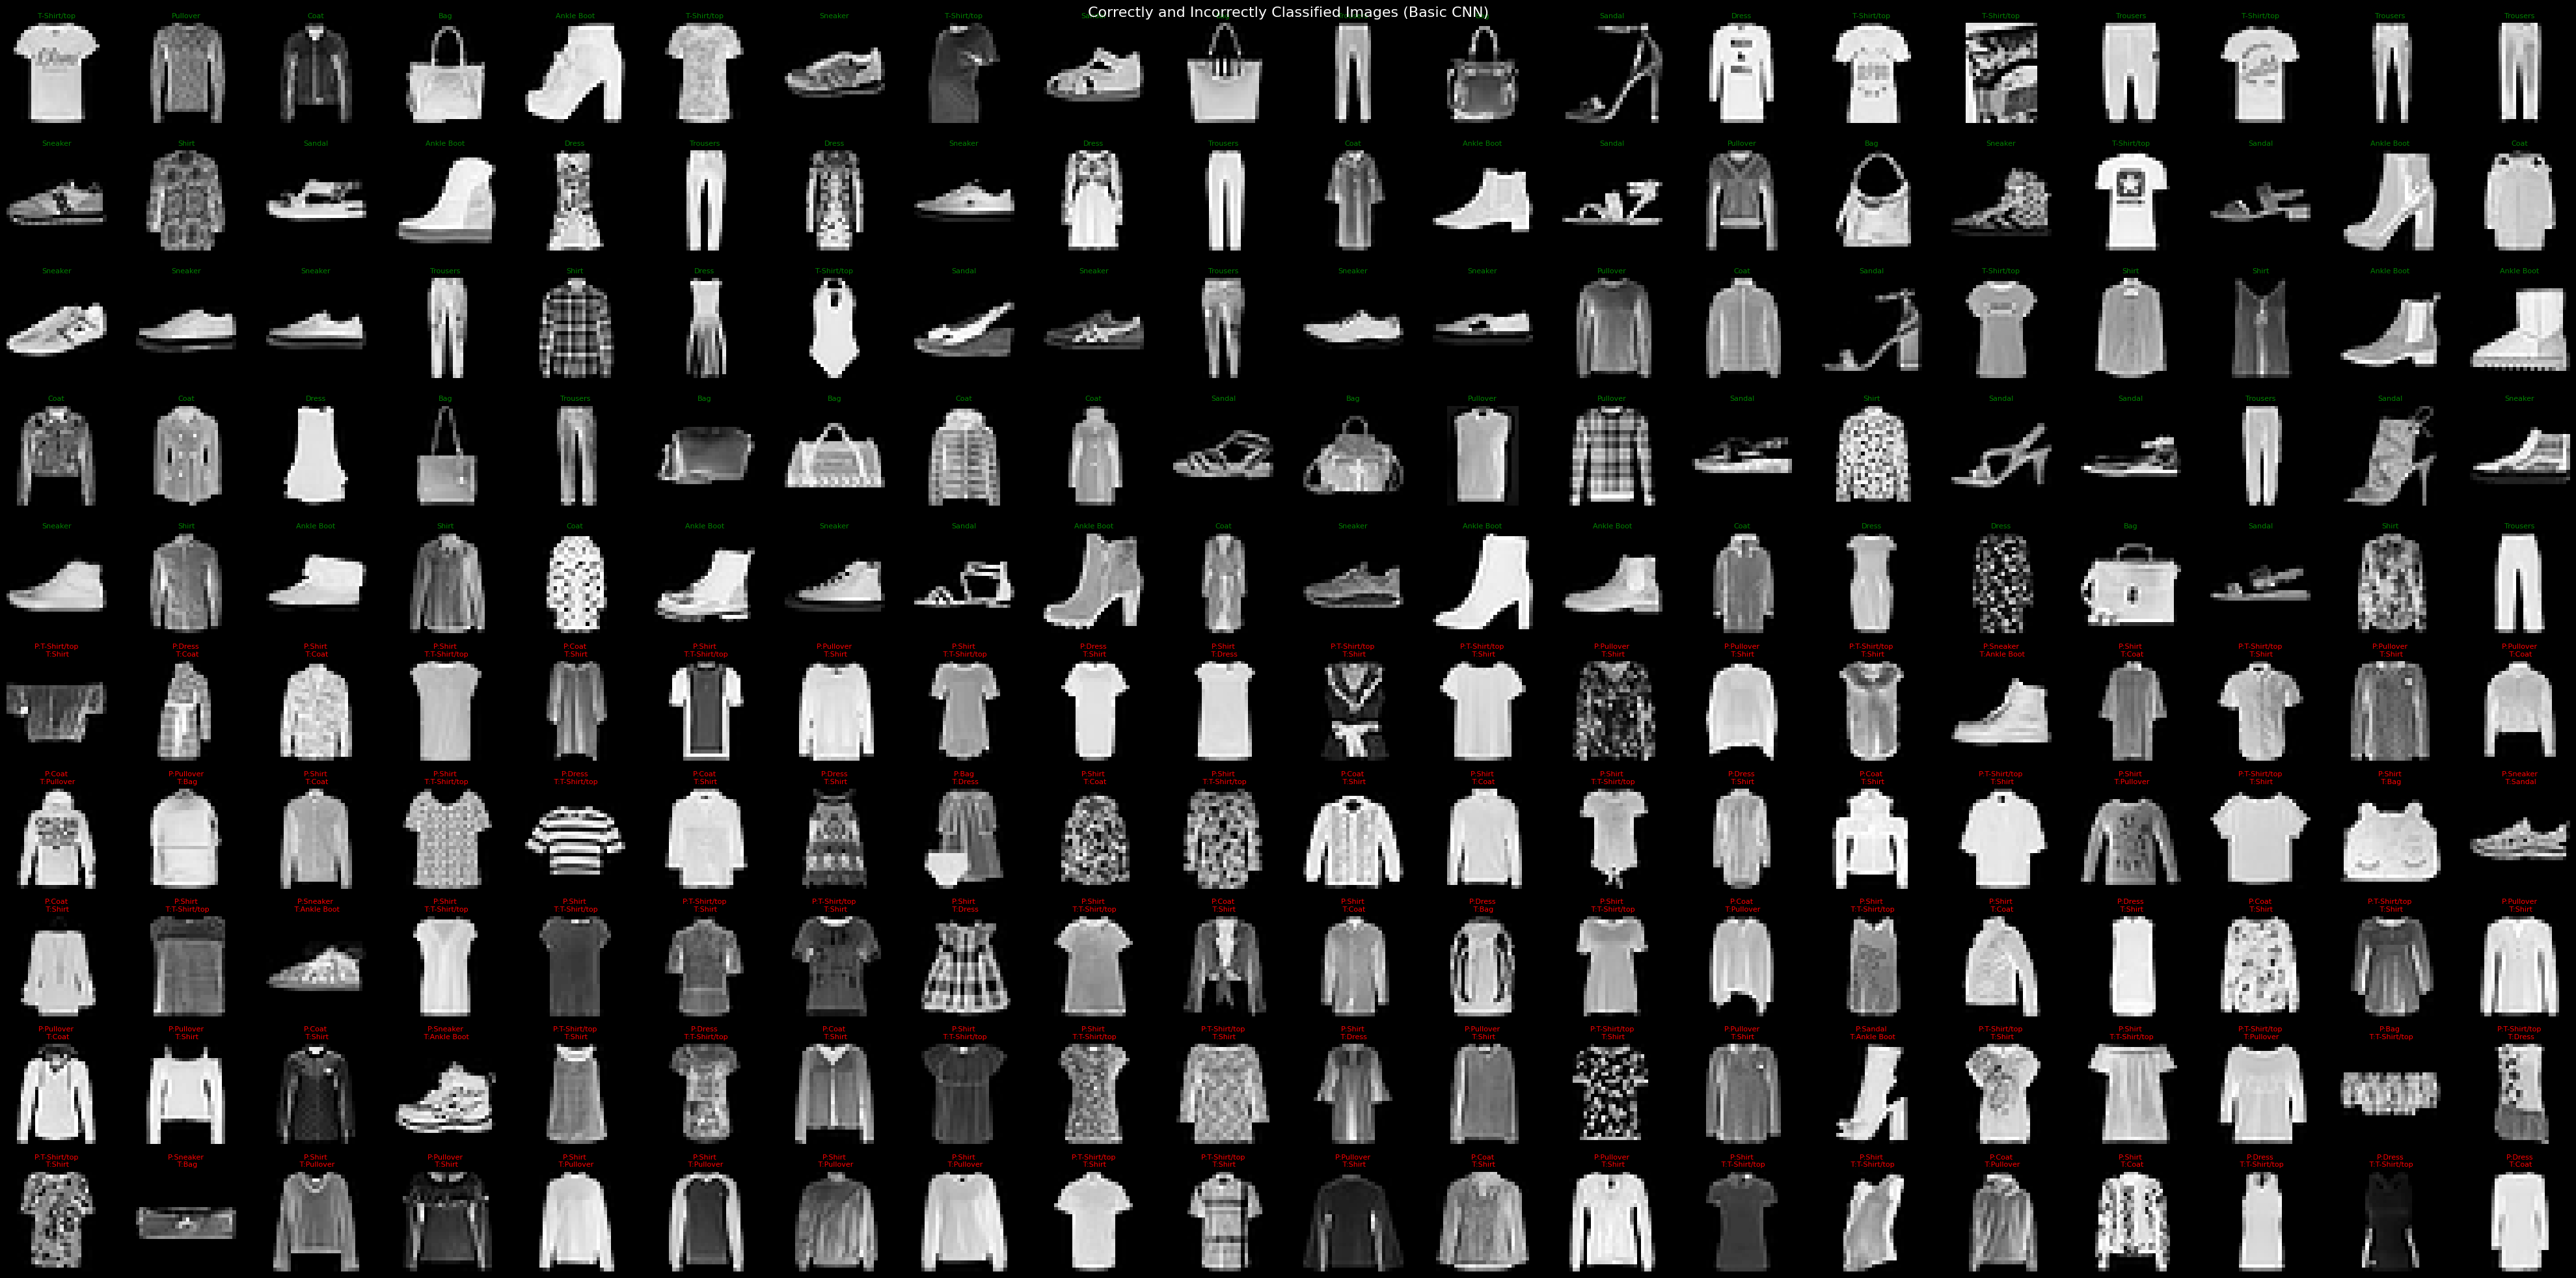

In [36]:
basic_cnn_predictions=basic_cnn_model.predict(test_images)
basic_cnn_predicted_labels=np.argmax(basic_cnn_predictions, axis=1)
correctly_classified_indices=np.where(basic_cnn_predicted_labels==test_labels)[0]
incorrectly_classified_indices=np.where(basic_cnn_predicted_labels!=test_labels)[0]

class_names=['T-Shirt/top','Trousers','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']
num_correct_to_show=100
num_incorrect_to_show=100
num_correct_to_show=min(num_correct_to_show,len(correctly_classified_indices))
num_incorrect_to_show=min(num_incorrect_to_show,len(incorrectly_classified_indices))

selected_correct_indices=np.random.choice(correctly_classified_indices,size=num_correct_to_show,replace=False)
selected_incorrect_indices=np.random.choice(incorrectly_classified_indices,size=num_incorrect_to_show,replace=False)

all_indices=np.concatenate([selected_correct_indices,selected_incorrect_indices])
# display images
num_cols=20
num_rows=10

num_images_to_show=num_correct_to_show + num_incorrect_to_show
fig,axes=plt.subplots(num_rows,num_cols,figsize=(2*num_cols,2*num_rows))
fig.suptitle('Correctly and Incorrectly Classified Images (Basic CNN)',fontsize=16)
for i,idx in enumerate(all_indices[:num_images_to_show]):
  row=i//num_cols
  col=i%num_cols
  axes[row,col].imshow(test_images[idx].reshape(28,28),cmap='gray')

  pred=class_names[basic_cnn_predicted_labels[idx]]
  true=class_names[test_labels[idx]]
  if basic_cnn_predicted_labels[idx]==test_labels[idx]:
    color='green'
    title=f"{pred}"
  else:
    color='red'
    title=f"P:{pred}\n T:{true}"
  axes[row,col].set_title(title,fontsize=8,color=color)
  axes[row,col].axis('off')
plt.tight_layout()
plt.show()